# Time Series Basics

In [27]:
import pandas as pd
import datetime

from pathlib import Path
%matplotlib inline

In [28]:
# parse_dates formats pertinent columns into datetime
# index_col sets the Date column as the data frame index
df = pd.read_csv(Path('../Resources/BTC.csv'), parse_dates=True, index_col='Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [29]:
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

### Slice Time Series Data

In [30]:
# Select all rows from September 2018
sep_2018 = df.loc['2018-09':'2020-12']
sep_2018.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-26,24677.015625,26718.070313,24522.689453,26437.037109,26437.037109,48332647295
2020-12-27,26439.373047,28288.839844,25922.769531,26272.294922,26272.294922,66479895605
2020-12-28,26280.822266,27389.111328,26207.640625,27084.808594,27084.808594,49056742893
2020-12-29,27081.810547,27370.720703,25987.298828,27362.437500,27362.437500,45265946774
2020-12-30,27955.673828,28928.992188,27445.654297,28873.593750,28873.593750,51416940544


In [31]:
# Select all rows from September through October for 2018
df.loc['2018-09':'2021-12'].head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-09-01,7044.810059,7242.290039,7038.049805,7193.250000,7193.250000,4116050000
2018-09-02,7189.580078,7306.310059,7132.160156,7272.720215,7272.720215,4329540000
2018-09-03,7279.029785,7317.939941,7208.149902,7260.060059,7260.060059,4087760000
2018-09-04,7263.000000,7388.259766,7255.439941,7361.660156,7361.660156,4273640000
2018-09-05,7361.459961,7388.430176,6792.830078,6792.830078,6792.830078,5800460000


### Plot Time Series Data

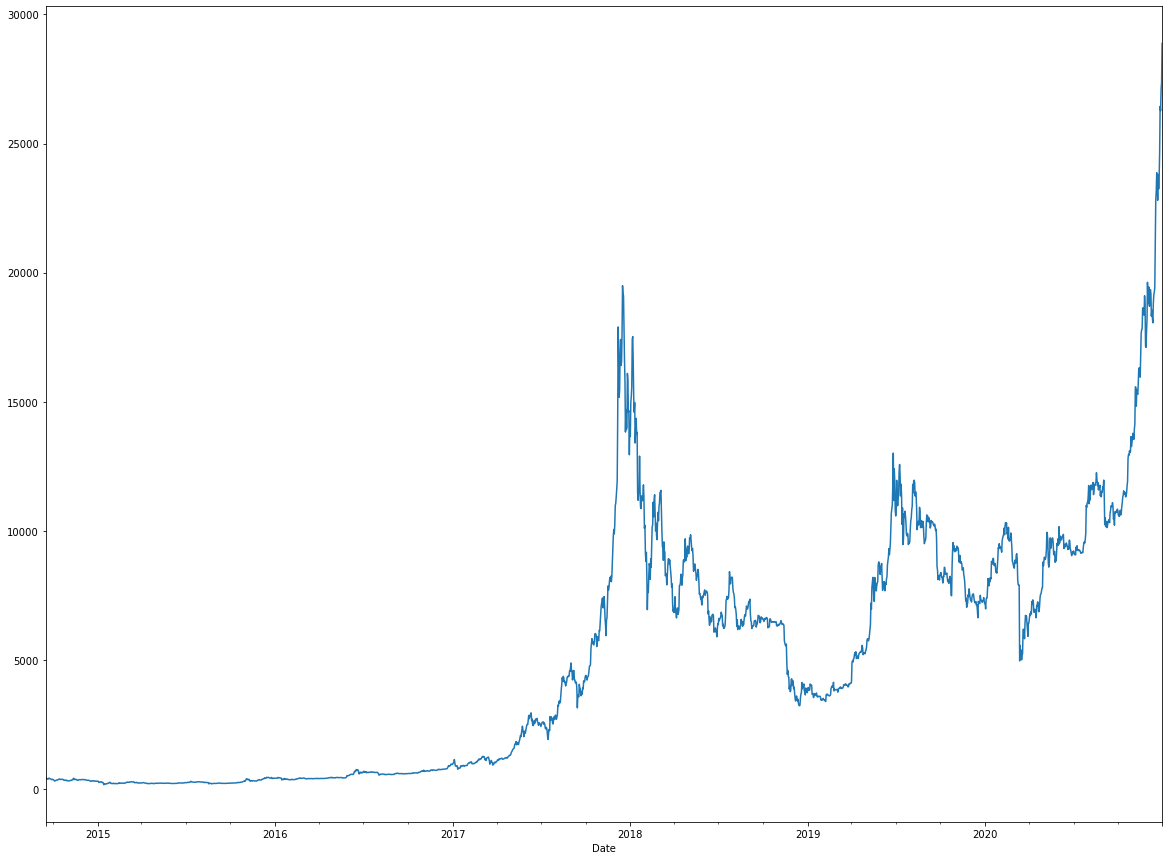

In [32]:
# Plot the closing prices using a line plot
df.Close.plot(figsize=(20,15));

### Resample Time Series Data

In [33]:
# Resample the closing prices to weekly and take the mean
# resample() is like groupby() for datetime
weekly = df['Close'].resample('Y').mean()

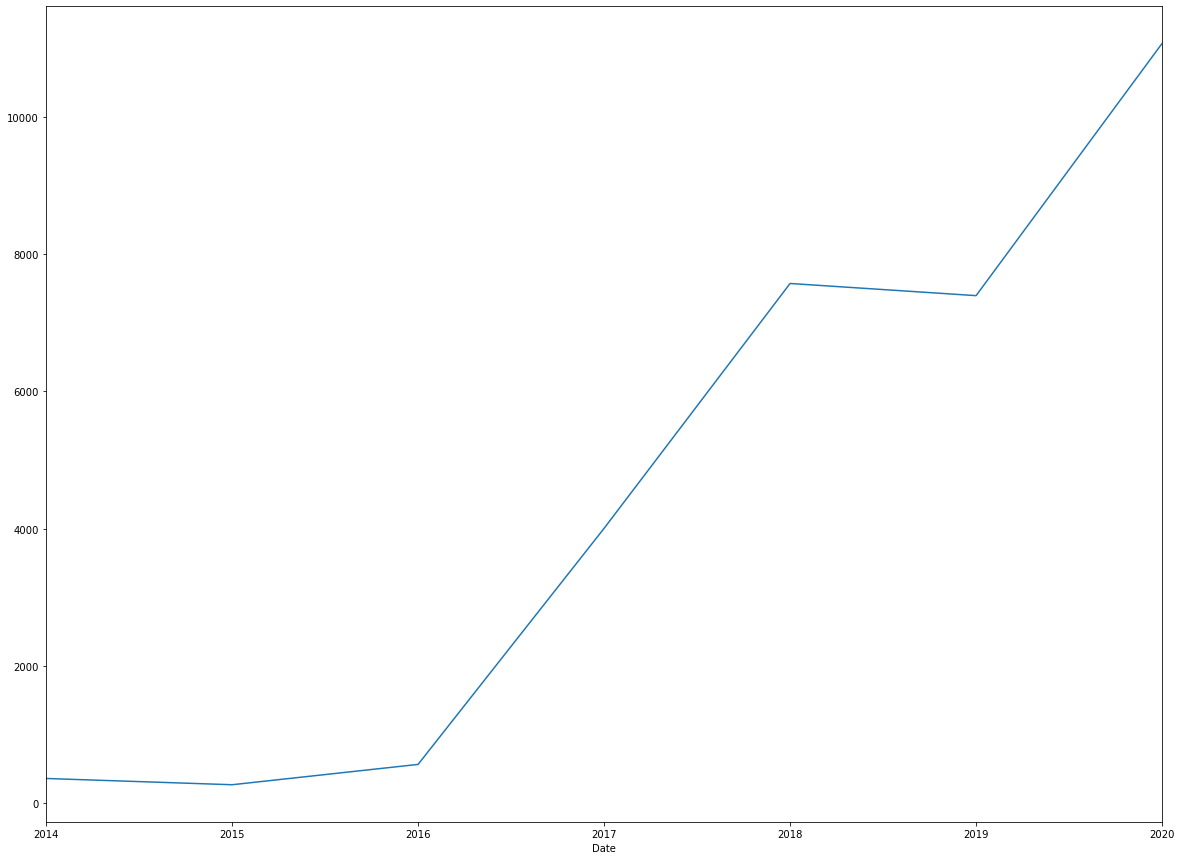

In [34]:
# Plot the weekly average closing prices as a line chart
weekly.plot(figsize=(20,15));

# Optional Challenge

In [35]:
# Select the rows that only contain `Close` in the column header
df.loc[:, df.columns.str.contains('Close')].head()

,Close,Adj Close
Date,,
2014-09-17,457.334015,457.334015
2014-09-18,424.440002,424.440002
2014-09-19,394.795990,394.795990
2014-09-20,408.903992,408.903992
2014-09-21,398.821014,398.821014


In [36]:
# parse_dates formats pertinent columns into datetime
# index_col sets the Date column as the data frame index
df_1 = pd.read_csv(Path('../Resources/BTC.csv'), parse_dates=True, index_col='Date')
df_1.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [37]:
# Use the `hpfilter` function to decompose the GDP column into the trend and noise components.
import statsmodels.api as sm

gdp_noise, gdp_trend = sm.tsa.filters.hpfilter(df_1["Close"])

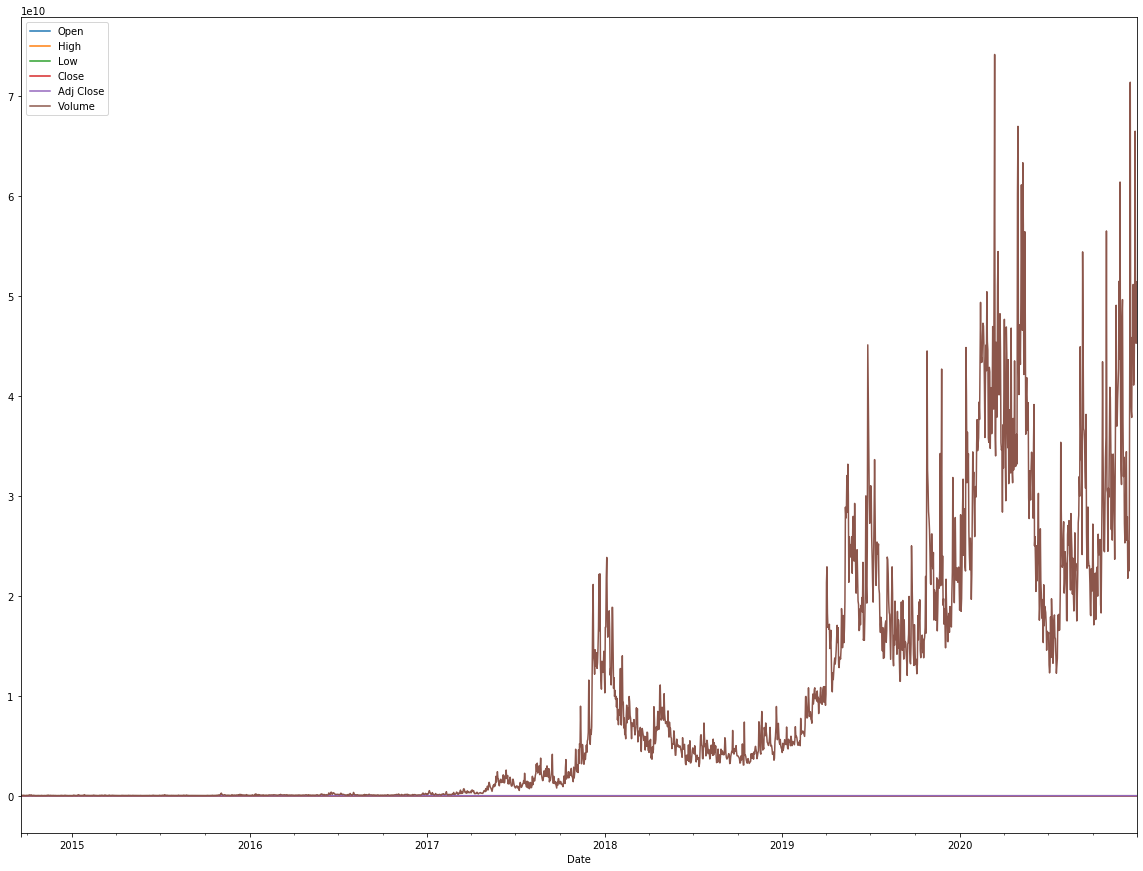

In [38]:
df_1.plot(figsize=(20,15))

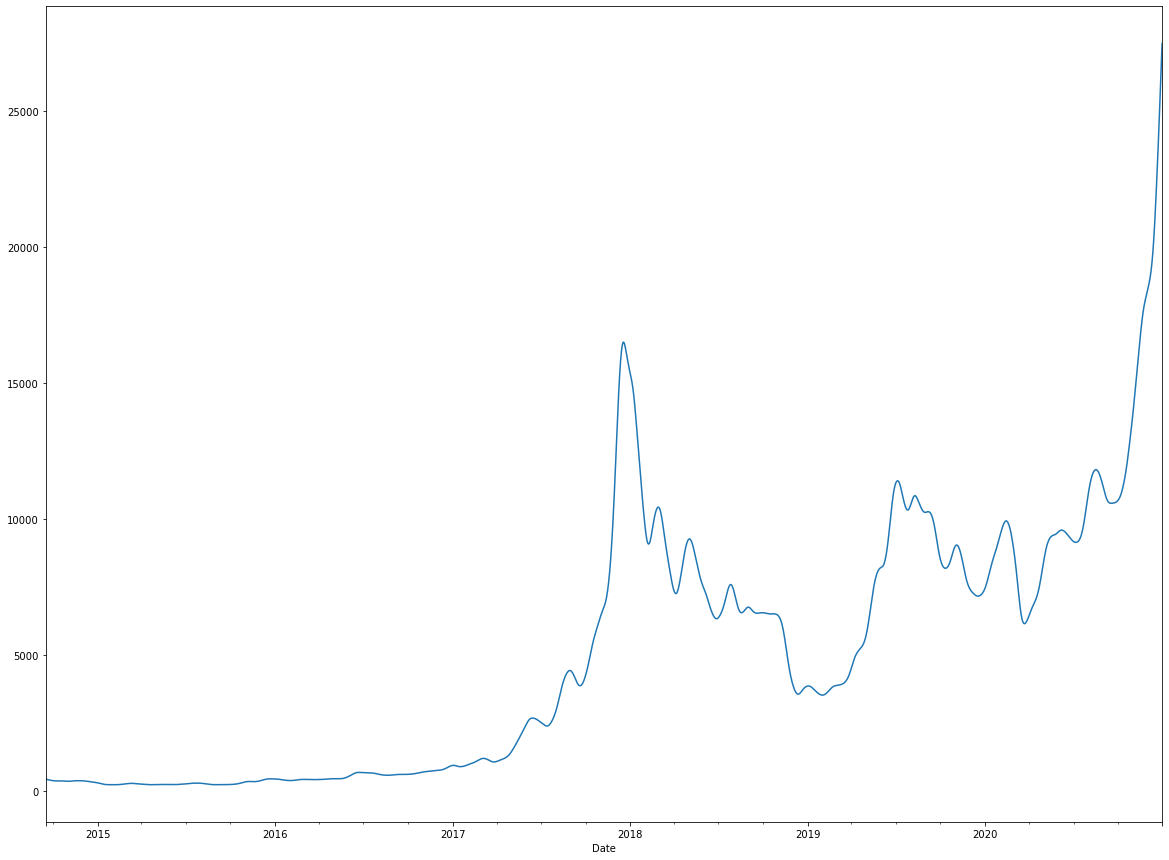

In [39]:
gdp_trend.plot(figsize=(20,15))

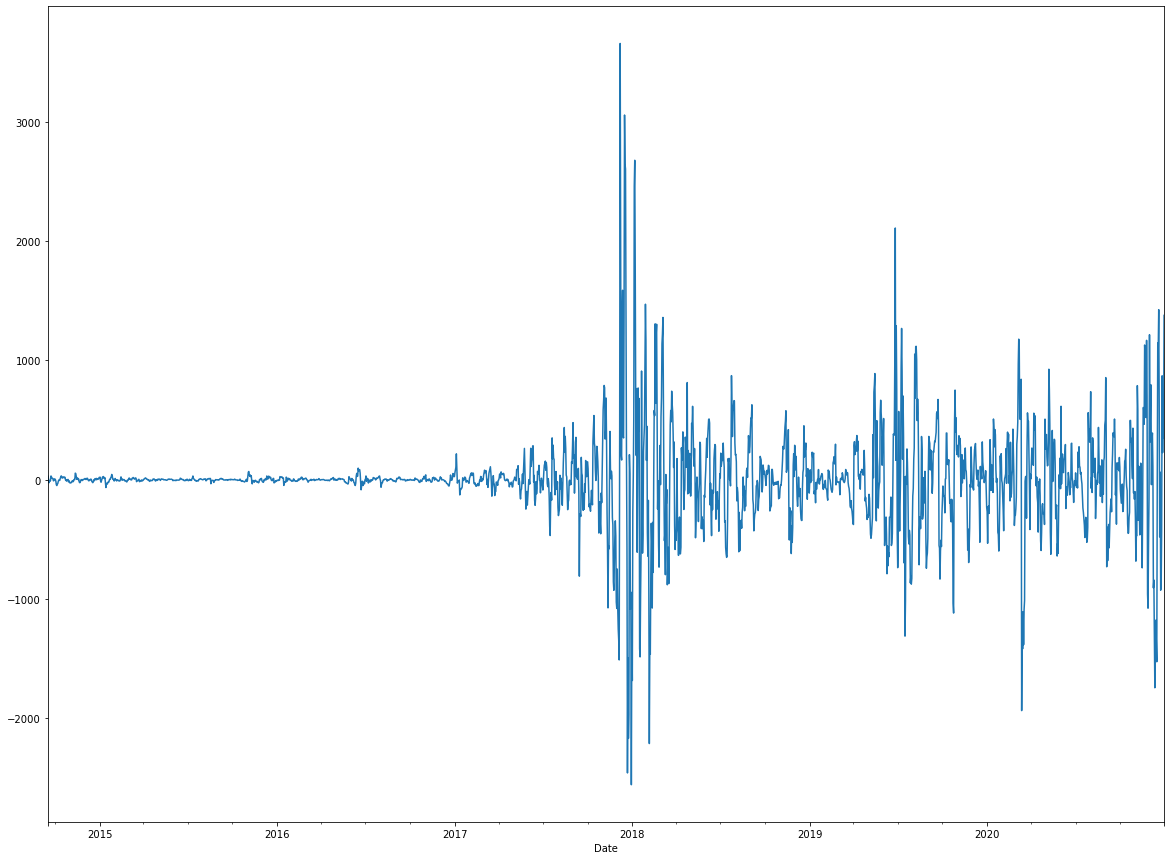

In [40]:
gdp_noise.plot(figsize=(20,15))

In [41]:
df_1.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [42]:
df_1.Close.autocorr(1)

0.9980091609294404

In [43]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

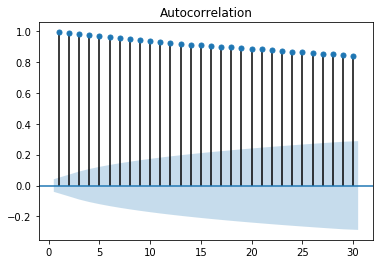

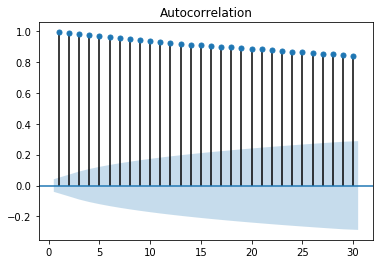

In [44]:
# Plot the ACF of the `bid_ask_spread` data with a lag of 30
plot_acf(df_1['Close'], lags=30, zero=False)

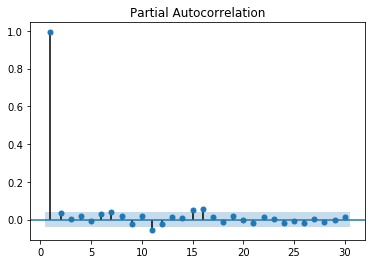

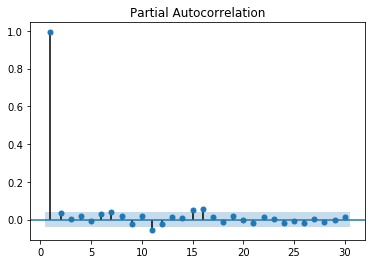

In [45]:
plot_pacf(df_1['Close'], lags=30, zero=False)

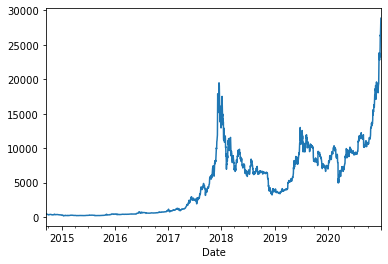

In [46]:
df_1.Close.plot()

In [47]:
# Apply the Augmented Dickey-Fuller test to determine if the above is stationary
from statsmodels.tsa.stattools import adfuller
adfuller(df_1.Close)

(1.4451278807636938,
 0.9973098107594814,
 27,
 2269,
 {'1%': -3.433235285765301,
  '5%': -2.862814646891805,
  '10%': -2.5674485535435454},
 32342.13180380556)

In [48]:
# Convert to stationary data by taking the `pct_change` of the Closing prices.
df_1['Returns'] = df_1.Close.pct_change()

In [49]:
# Drop the NaNs created by the pct_change function
df_1 = df_1.dropna()

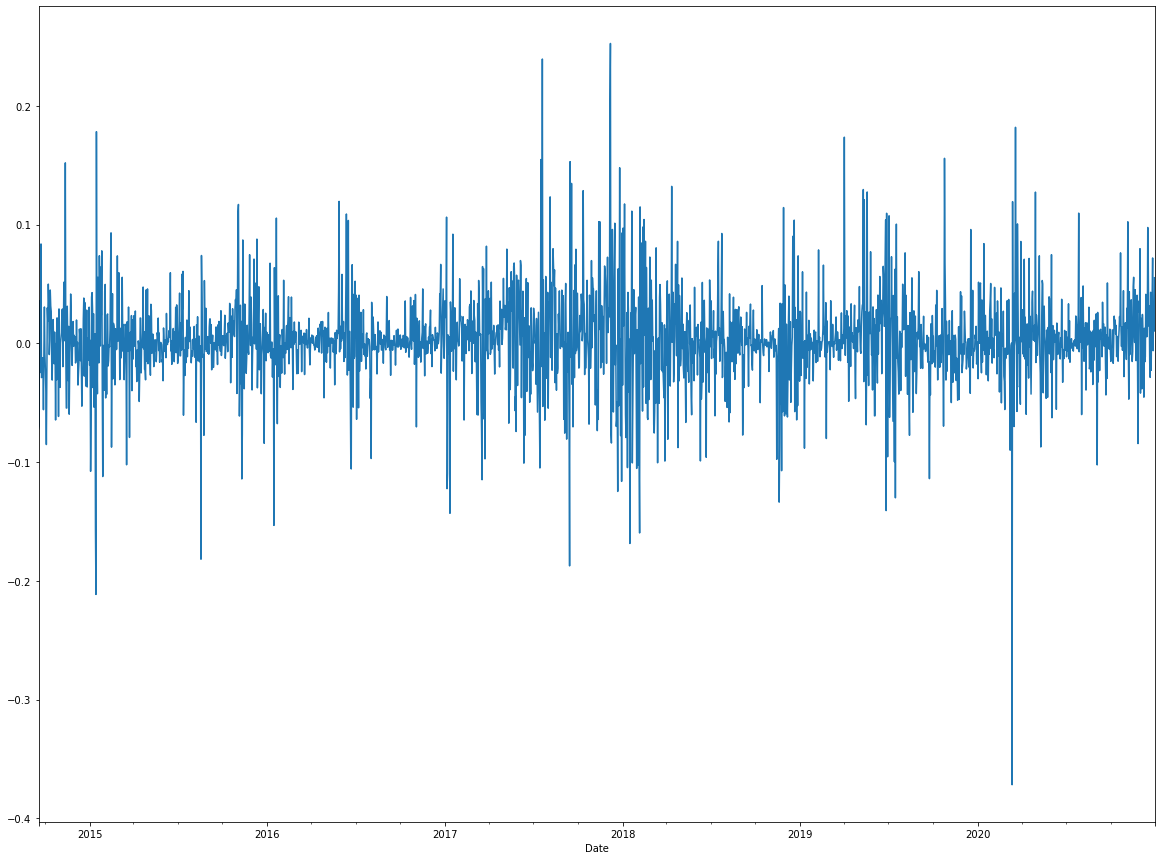

In [50]:
# Plot the returns as a line chart. 
# You should no longer see the upward trend in the data
df_1.Returns.plot(figsize=(20,15))

In [51]:
# Subtract the upward trend for the closing prices using the `diff()` function
df_1['Diff'] = df_1.Close.diff()

<ipython-input-51-65f0d9670af8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Diff'] = df_1.Close.diff()


In [52]:
# Drop the NaNs created from the diff function
df_1 = df_1.dropna()

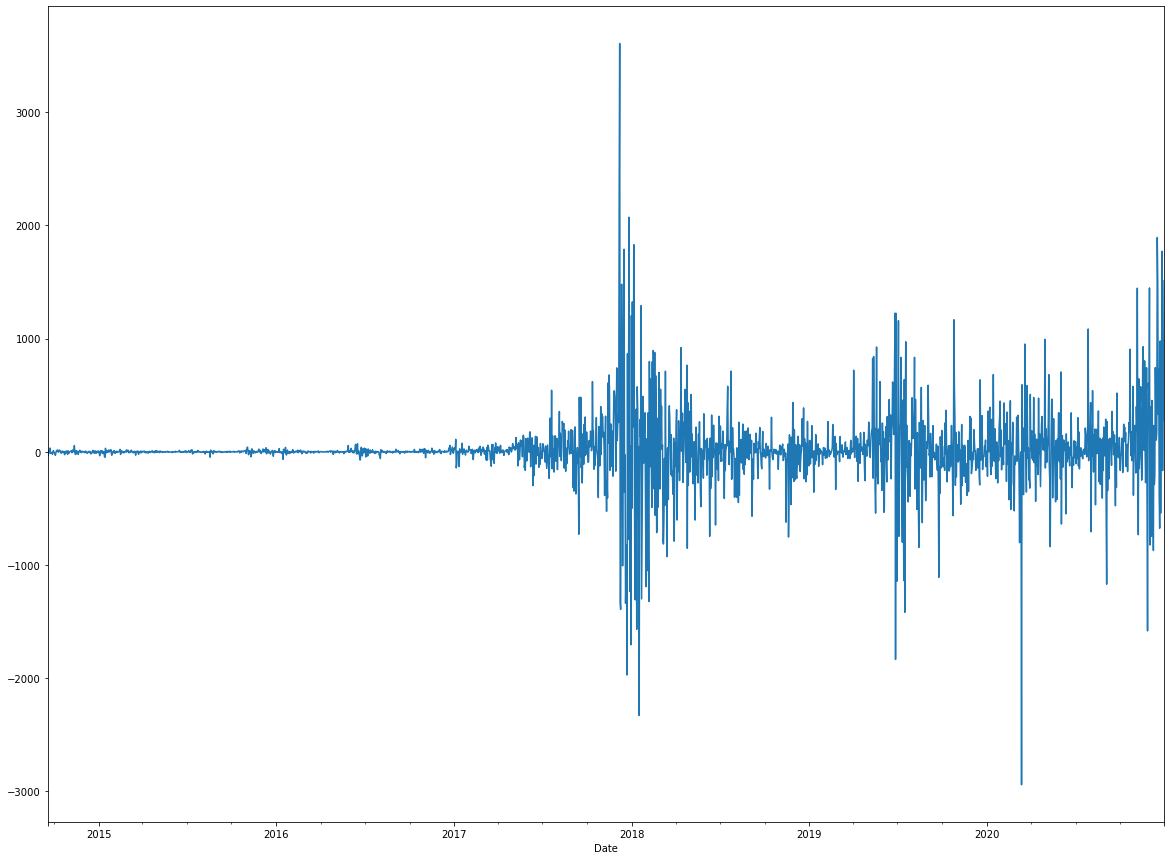

In [53]:
# Plot the 
df_1.Diff.plot(figsize=(20,15))

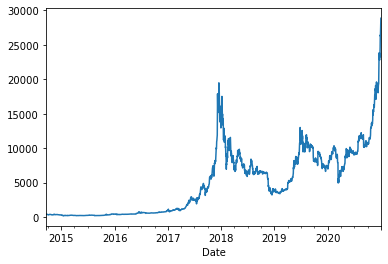

In [54]:
# The series is non-stationary (Trends upwards)
df_1.Close.plot()

In [55]:
# Select only the returns
returns = df_1.loc[:, 'Return']

KeyError: 'Return'

In [56]:
# Stationarity now seen
returns.plot(figsize=(20,15))

NameError: name 'returns' is not defined

In [57]:
# Import the ARMA model
from statsmodels.tsa.arima_model import ARMA

In [58]:
# Create the ARMA model using the return values and the order
# For the order parameter, the first 1 indicates the number of AR lags
# For the order parameter, the second 1 indicates the number of MA lags
model = ARMA(returns.values, order=(2,2))

NameError: name 'returns' is not defined

In [ ]:
# Fit the model to the data
results = model.fit()

In [ ]:
df_1['Return'].tail(20)

In [ ]:
# Plot the forecasted return for the next 10 days
pd.DataFrame(results.forecast(steps=10)[0]).plot(title="Stock Return Forecast", figsize=(20,15))

In [ ]:
# Summarize the model
results.summary()

In [ ]:
df_1.Close.plot()

In [ ]:
# Differencing the Settle price stationarizes the time series
df_1.Close.diff().plot()

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
# Create an ARIMA model
model = ARIMA(df_1.Close.values, order=(1, 1, 1))

In [ ]:
# Fit the model to the data
results = model.fit()

In [ ]:
# Print the model summary
results.summary()

In [ ]:
# Plot the Futures Price Forecast
pd.DataFrame(results.forecast(steps=10)[0]).plot(title="Futures Forecast")

In [ ]:
# ARIMA Model using a Lag of 2

In [ ]:
# Create an ARIMA Model and fit it to the data
model2 = ARIMA(df_1.Close.values, order=(2, 1, 1))
results2 = model2.fit()

In [ ]:
# print the model summary
results2.summary()

In [ ]:
# Plot the Futures Price Forecast
pd.DataFrame(results2.forecast(steps=10)[0]).plot(title="Futures Forecast")

In [ ]:
from arch import arch_model

In [ ]:
# 'p' and 'q'  are akin to the 'p' and 'q' of an ARMA model.
# 'vol="GARCH"' means that we're using a GARCH model.
# The 'mean="Zero"' means that we're estimating a GARCH.
model = arch_model(returns * 100, mean="Zero", vol="GARCH", p=1, q=1)

In [ ]:
# Fit the GARCH Model
res = model.fit(disp="off")

In [ ]:
# Summarize the model results
res.summary()

In [ ]:
# Plot the model estimate of annualized volatility
fig = res.plot(annualize='D')

In [ ]:
# Construct Volatility Forecasts for the next 3 days
forecast_horizon = 3
# Take the last day of the data we used above. 
# If forecast horizon is 3, then the resulting 'h.1', 'h.2', and 'h.3' 
# are the forecasts for the following 3 days.
forecasts = res.forecast(start='2020-12-30', horizon=forecast_horizon)
forecasts

In [ ]:
# Annualize the forecast
import numpy as np

intermediate = np.sqrt(forecasts.variance.dropna() * 252)
intermediate

In [ ]:
# The name of the column here is the date of the forecast.
# Each row represents the forecast of volatility for the following days.
# Transposing makes the forecast easier to plot
final = intermediate.dropna().T
final

In [ ]:
final.plot()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [ ]:
df_shorttimeframe = df_1["2020-12-01":]
df_shorttimeframe.Close.head()

In [ ]:
# The data in the df column must be reshaped into an array with shape (num_samples, num_features)
# https://stackoverflow.com/questions/18691084/what-does-1-mean-in-numpy-reshape
X = df_shorttimeframe.reset_index().Date.apply(lambda t: t.timestamp()).values.reshape(-1, 1)
X[:5]

In [ ]:
# The shape of X is 30 samples, with a single feature (column)
X.shape

In [ ]:
y = df_shorttimeframe.Close

In [ ]:
# Create a model with scikit-learn
model = LinearRegression()
model

In [ ]:
# Fit the data into the model
# By convention, X is capitalized and y is lowercase
model.fit(X, y)

In [ ]:
# The slope
print(model.coef_)

In [ ]:
# The y-intercept
print(model.intercept_)

In [ ]:
# The model creates predicted y values based on X values
predicted_y_values = model.predict(X)


In [ ]:
# Plot the results. The best fit line is red.
plt.scatter(X, y)
plt.plot(X, predicted_y_values, color='red')

In [ ]:
# Add columns of returns and lagged returns to the data frame
# The lagged returns are created to associate a date with its returns
df_1['Return'] = returns.copy()
df_1['Lagged_Return'] = returns.shift()
# Drop NaN values
df_1 = df_1.dropna()
df_1.head()

In [ ]:
# Set y as the `Return` column
y = df_1['Return']

In [ ]:
# Select the `Lagged_Return` as a DataFrame
X = df_1['Lagged_Return'].to_frame()
X.head()

In [ ]:
# Access the weekofyear attribute from the index
# Create a new column with this called `Week_of_year`
X['Week_of_year'] = X.index.weekofyear
X.tail()

In [ ]:
# Use `get_dummies` to generate the features for each week of the year
X_binary_encoded = pd.get_dummies(X, columns=['Week_of_year'])
X_binary_encoded.tail()

In [ ]:
# Create a Linear Regression model and fit it to the data
model = LinearRegression()
model.fit(X_binary_encoded, y)

In [ ]:
# List the first 10 predicted values
predictions = model.predict(X_binary_encoded)
predictions[:10]